In [1]:
% matplotlib inline

import time
import pandas as pd

from IPython import display as d

import seaborn as sns
sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import ADASYN

from libs import container
from libs.experiment import (
    WithAnotherExperiment, KFoldExperiment, roc, 
    discretize_classes, clean_features)

In [2]:
data = container.Container(sample=pd.read_pickle("data/sample.pkl"))
data["balanced"] = pd.concat((
    data.sample[data.sample.nbg == 1].sample(786),
    data.sample[data.sample.nbg == 0]))
data["small_sample"] = pd.read_pickle("data/small_sample.pkl")

## Features cleaning

In [3]:
sclasses = {
    "nbg": 1,
    "no-nbg": 0}
sclasses

{'nbg': 1, 'no-nbg': 0}

In [4]:
data.sample.shape, data.balanced.shape, data.small_sample.shape

((12598, 161), (1572, 161), (4352, 161))

In [5]:
X_columns = clean_features(data, "sample")
X_columns = X_columns[
    ~(X_columns.str.contains("Freq2_") | X_columns.str.contains("Freq3_"))]
print("Total features:", X_columns.size)

Removing [] because null
Removing ['src1_Freq1_harmonics_rel_phase_0', 'src1_Freq2_harmonics_rel_phase_0', 'src1_Freq3_harmonics_rel_phase_0', 'src2_Freq1_harmonics_rel_phase_0', 'src2_Freq2_harmonics_rel_phase_0', 'src2_Freq3_harmonics_rel_phase_0'] because lowvariance
('Total features:', 114)


In [6]:
set(x.split("_", 1)[-1] for x in X_columns)

{'Amplitude',
 'AmplitudeH',
 'AmplitudeJ',
 'AmplitudeJH',
 'AmplitudeJK',
 'Autocor_length',
 'Beyond1Std',
 'CAR_mean',
 'CAR_sigma',
 'CAR_tau',
 'Con',
 'Eta_e',
 'FluxPercentileRatioMid20',
 'FluxPercentileRatioMid35',
 'FluxPercentileRatioMid50',
 'FluxPercentileRatioMid65',
 'FluxPercentileRatioMid80',
 'Freq1_harmonics_amplitude_0',
 'Freq1_harmonics_amplitude_1',
 'Freq1_harmonics_amplitude_2',
 'Freq1_harmonics_amplitude_3',
 'Freq1_harmonics_rel_phase_1',
 'Freq1_harmonics_rel_phase_2',
 'Freq1_harmonics_rel_phase_3',
 'Gskew',
 'LinearTrend',
 'MaxSlope',
 'Mean',
 'Meanvariance',
 'MedianAbsDev',
 'MedianBRP',
 'PairSlopeTrend',
 'PercentAmplitude',
 'PercentDifferenceFluxPercentile',
 'PeriodLS',
 'Period_fit',
 'Psi_CS',
 'Psi_eta',
 'Q31',
 'Rcs',
 'Skew',
 'SmallKurtosis',
 'Std',
 'c89_c3',
 'c89_hk_color',
 'c89_jh_color',
 'c89_jk_color',
 'c89_m2',
 'c89_m4',
 'cnt',
 'n09_c3',
 'n09_hk_color',
 'n09_jh_color',
 'n09_jk_color',
 'n09_m2',
 'n09_m4',
 'ppmb'}

## SVM - Linear

In [7]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=ADASYN(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[YsuTcRoBYKDEqguV2juu6g-2018-10-12 16:29:04.511380] Launching
[PYXqtBabjNZcQ88ps9m6gH-2018-10-12 16:29:04.898088] Launching
[MvtEcWZisD8mmJZ3WzCZbP-2018-10-12 16:29:05.280398] Launching
[dwwcZvDsiyNrkKr44chaG9-2018-10-12 16:29:05.669769] Launching
[jtF7StZQbykXMee7xoF32G-2018-10-12 16:29:06.060259] Launching
[izhD9hSr8psmSXcLA6XG5D-2018-10-12 16:29:06.451972] Launching
[QF6NX4r9Zt7cDZD4VLavnb-2018-10-12 16:29:06.847490] Launching
[so9btqvo6QPJ4uJRuYzrW9-2018-10-12 16:29:07.248285] Launching
[24FkJ77tqxwaGFPnHDLfmF-2018-10-12 16:29:07.650997] Launching
[uj3adQJt2D3vey3J2pL53W-2018-10-12 16:29:08.045841] Launching
[uj3adQJt2D3vey3J2pL53W-2018-10-12 16:32:45.074646] Done
[QF6NX4r9Zt7cDZD4VLavnb-2018-10-12 16:32:48.275336] Done
[so9btqvo6QPJ4uJRuYzrW9-2018-10-12 16:33:12.593604] Done
[izhD9hSr8psmSXcLA6XG5D-2018-10-12 16:33:26.458240] Done
[24FkJ77tqxwaGFPnHDLfmF-2018-10-12 16:33:27.998243] Done
[YsuTcRoBYKDEqguV2juu6g-2018-10-12 16:33:38.799244] Done
[MvtEcWZisD8mmJZ3WzCZbP-2018-10-12 16:

## SVM - Poly

In [8]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=ADASYN(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[bxneccJp7jHHWakhuTuJcC-2018-10-12 16:34:02.562136] Launching
[gAarnztWr6GkgMN6dP4Eqi-2018-10-12 16:34:02.995124] Launching
[mGAD2P3QjR4ppSGhxEpE2Q-2018-10-12 16:34:03.432562] Launching
[w4HPQmuhuvtAJ4KfSP8xSd-2018-10-12 16:34:03.893897] Launching
[gUpAtXjgX7xr3SEZuDa9WM-2018-10-12 16:34:04.336667] Launching
[NgY2Cde4stmUoSdnEbzAnH-2018-10-12 16:34:04.784516] Launching
[DBkftrVFMSyMUDD4aaU9Wg-2018-10-12 16:34:05.238305] Launching
[Y3fgVHdANMFkTWXdRk357j-2018-10-12 16:34:05.695164] Launching
[sdudS5JUZMmUkcTqjr6aP7-2018-10-12 16:34:06.163665] Launching
[DHzfFtB3cSdUSwaFgwg9Kc-2018-10-12 16:34:06.628074] Launching
[DBkftrVFMSyMUDD4aaU9Wg-2018-10-12 16:35:38.890683] Done
[NgY2Cde4stmUoSdnEbzAnH-2018-10-12 16:35:45.116820] Done
[Y3fgVHdANMFkTWXdRk357j-2018-10-12 16:35:46.675622] Done
[sdudS5JUZMmUkcTqjr6aP7-2018-10-12 16:35:53.968598] Done
[DHzfFtB3cSdUSwaFgwg9Kc-2018-10-12 16:36:12.809709] Done
[gUpAtXjgX7xr3SEZuDa9WM-2018-10-12 16:36:13.766817] Done
[gAarnztWr6GkgMN6dP4Eqi-2018-10-12 16:

## Random Forest

In [9]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=sclasses, sampler=ADASYN(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[kyq7jumorbxZ66FGtsqRhE-2018-10-12 16:36:44.488413] Launching
[UNkFozzsvTTD4eYc5FPXq8-2018-10-12 16:36:44.920713] Launching
[jKvzLWyutT7QfE4VvVDVFk-2018-10-12 16:36:45.343569] Launching
[RGK6gaFXA6eqMxg7VwwKDh-2018-10-12 16:36:45.747973] Launching
[uzmaDX95vWjM2MpEAEQzei-2018-10-12 16:36:46.154936] Launching
[8Px3Y3BJYYJqUkt9rspzvd-2018-10-12 16:36:46.574192] Launching
[eT39vnADEUztUEJRZdQ7mC-2018-10-12 16:36:46.955594] Launching
[FNx4CWfzewq9gsnMhbwXPP-2018-10-12 16:36:47.359068] Launching
[HBapHJXrwkrZrPHu6AQLmH-2018-10-12 16:36:47.761608] Launching
[o8ArqJNc3ii7VeP4nBXDEg-2018-10-12 16:36:48.158313] Launching
[kyq7jumorbxZ66FGtsqRhE-2018-10-12 16:39:03.578008] Done
[o8ArqJNc3ii7VeP4nBXDEg-2018-10-12 16:39:16.552793] Done
[8Px3Y3BJYYJqUkt9rspzvd-2018-10-12 16:39:20.040931] Done
[eT39vnADEUztUEJRZdQ7mC-2018-10-12 16:39:22.147866] Done
[HBapHJXrwkrZrPHu6AQLmH-2018-10-12 16:39:22.427118] Done
[FNx4CWfzewq9gsnMhbwXPP-2018-10-12 16:39:22.621565] Done
[RGK6gaFXA6eqMxg7VwwKDh-2018-10-12 16:

## KNN

In [10]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=sclasses, sampler=ADASYN(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[FG2NMgM3zjKez4pSLisNAn-2018-10-12 16:39:32.179315] Launching
[bZ3b5XaSPYfWBVqSAWCKBo-2018-10-12 16:39:32.558455] Launching
[oGigJyizrhytVr3GuG5rhj-2018-10-12 16:39:32.927936] Launching
[7XuZRxn2WsXVpg4cjibWte-2018-10-12 16:39:33.310121] Launching
[zNYxv8YhMfr2P8cvBBkDaB-2018-10-12 16:39:33.679239] Launching
[ZCZGxYnBXjduWKZXETD7KP-2018-10-12 16:39:34.063451] Launching
[topk4k7kZGBTEcWAXYp5Cb-2018-10-12 16:39:34.509708] Launching
[XBRiLTiyEfw9xR7wfPMikb-2018-10-12 16:39:34.959418] Launching
[EPALCXwmiRWYb8LbfH3Rg4-2018-10-12 16:39:35.421579] Launching
[ieSaWc32LrYw4ZixeJT69g-2018-10-12 16:39:35.878670] Launching
[FG2NMgM3zjKez4pSLisNAn-2018-10-12 16:39:38.054961] Done
[zNYxv8YhMfr2P8cvBBkDaB-2018-10-12 16:39:38.472858] Done
[ZCZGxYnBXjduWKZXETD7KP-2018-10-12 16:39:38.512822] Done
[oGigJyizrhytVr3GuG5rhj-2018-10-12 16:39:39.114520] Done
[bZ3b5XaSPYfWBVqSAWCKBo-2018-10-12 16:39:39.268043] Done
[7XuZRxn2WsXVpg4cjibWte-2018-10-12 16:39:40.450397] Done
[EPALCXwmiRWYb8LbfH3Rg4-2018-10-12 16:

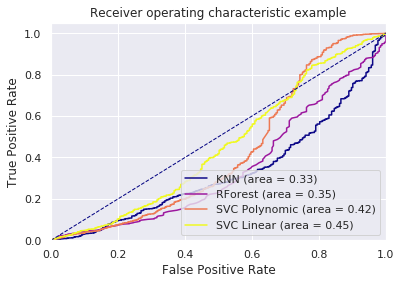

In [11]:
roc({"KNN": knn, "RForest": rf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})